In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
# from matplotlib.animation import FuncAnimation

In [2]:
np.random.seed(0)
X = np.linspace(0, 10, 100)
y = (0.5 * X + np.random.normal(0, 1, 100) > 4).astype(int)

In [3]:
# adding a bias term
X_b = np.c_[np.ones(X.shape[0]), X] # (100, 2)

In [4]:
	# sigmoid function
def sigmoid(z):
	return 1 / (1 + np.exp(-z))

In [5]:
# log likelohod function
def log_likelihood(X, y, theta):
    z = np.dot(X, theta)
    h = sigmoid(z)
    return np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))


In [6]:
# gradient
def gradient(X, y, theta):
	z = np.dot(X, theta)
	h = sigmoid(z)
	return np.dot(X.T, (h - y))

In [7]:
# gredient ascent
def gradient_ascent(X, y, alpha=0.01, num_iterations=1000):
    theta = np.zeros(X.shape[1])
    path = []
    for i in range(num_iterations):
        theta = theta + alpha * gradient(X, y, theta)
        path.append(theta.copy())
    return np.array(path)

In [8]:
path = gradient_ascent(X_b, y, alpha=0.05, num_iterations=100)

In [9]:
path

array([[1.40000000e+00, 3.02020202e+00],
       [5.25872730e+00, 1.85278505e+01],
       [9.15842128e+00, 3.40480469e+01],
       [1.30584158e+01, 4.95682489e+01],
       [1.69584157e+01, 6.50884509e+01],
       [2.08584157e+01, 8.06086530e+01],
       [2.47584157e+01, 9.61288550e+01],
       [2.86584157e+01, 1.11649057e+02],
       [3.25584157e+01, 1.27169259e+02],
       [3.64584157e+01, 1.42689461e+02],
       [4.03584157e+01, 1.58209663e+02],
       [4.42584157e+01, 1.73729865e+02],
       [4.81584157e+01, 1.89250067e+02],
       [5.20584157e+01, 2.04770269e+02],
       [5.59584157e+01, 2.20290471e+02],
       [5.98584157e+01, 2.35810673e+02],
       [6.37584157e+01, 2.51330875e+02],
       [6.76584157e+01, 2.66851077e+02],
       [7.15584157e+01, 2.82371279e+02],
       [7.54584157e+01, 2.97891481e+02],
       [7.93584157e+01, 3.13411683e+02],
       [8.32584157e+01, 3.28931885e+02],
       [8.71584157e+01, 3.44452087e+02],
       [9.10584157e+01, 3.59972289e+02],
       [9.495841

In [10]:
t0_range = np.linspace(-5, 5, 100)
t1_range = np.linspace(-1, 2, 100)
T0, T1 = np.meshgrid(t0_range, t1_range)

In [11]:
LL = np.array([ log_likelihood(X_b, y, np.array([t0, t1])) for t0, t1 in zip(np.ravel(T0), np.ravel(T1))]).reshape(T0.shape)

In [12]:
LL.shape

(100, 100)

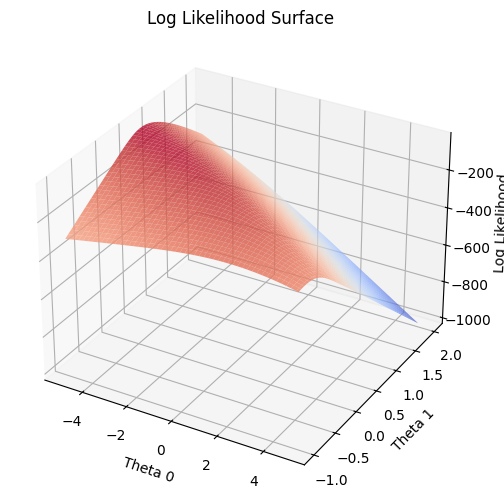

In [13]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T0, T1, LL, cmap=cm.coolwarm, alpha=0.8)

ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')
ax.set_zlabel('Log Likelihood')
ax.set_title('Log Likelihood Surface')
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_22512\1997680515.py:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
C:\Users\admin\AppData\Local\Temp\ipykernel_22512\1997680515.py:5: RuntimeWarning: invalid value encountered in multiply
  return np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))


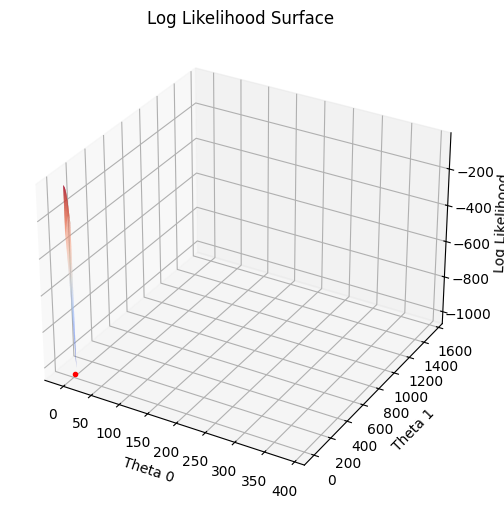

In [14]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T0, T1, LL, cmap=cm.coolwarm, alpha=0.8)
ax.plot(path[:, 0], path[:, 1], [log_likelihood(X_b, y, theta) for theta in path], color='red', marker='o', markersize=3, label='Gradient Ascent Path')
ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')
ax.set_zlabel('Log Likelihood')
ax.set_title('Log Likelihood Surface')
plt.show()